<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Sales-analysis/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv('/content/sales.csv')

In [ ]:
sales

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A,New York,Member,Female,Shampoo,Stationery,1.55,11,1.19,18.24,1
996,997,A,New York,Member,Male,Detergent,Personal Care,2.44,7,1.20,18.28,1
997,998,A,New York,Member,Female,Shampoo,Stationery,17.92,2,2.51,38.35,3
998,999,A,New York,Member,Female,Shampoo,Beverages,17.41,4,4.87,74.51,7


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [ ]:
sales.describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000
max,1000.000000,20.980000,20.000000,28.390000,433.990000,43.000000


In [ ]:
branch_sales = sales.groupby('branch')['city'].unique()
branch_sales

,city
branch,
A,"[New York, Chicago]"
B,[Los Angeles]


In [ ]:
branch_sales_price = sales.groupby('branch')['total_price'].sum()
branch_sales_price

,total_price
branch,
A,82811.64
B,35772.26


Text(0.5, 1.0, 'Total price by branch')

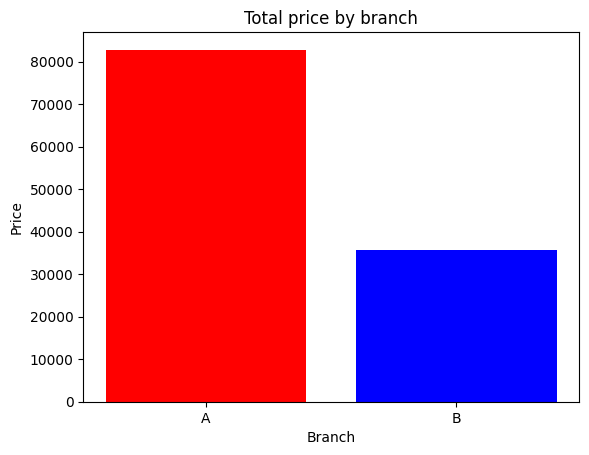

In [ ]:
plt.bar(branch_sales_price.index, branch_sales_price.values, color=['red','blue'])
plt.xlabel('Branch')
plt.ylabel('Price')
plt.title('Total price by branch')

In [ ]:
city_sales = sales.groupby('city')['total_price'].sum()
city_sales

,total_price
city,
Chicago,42584.71
Los Angeles,35772.26
New York,40226.93


Text(0.5, 1.0, 'Total price by city')

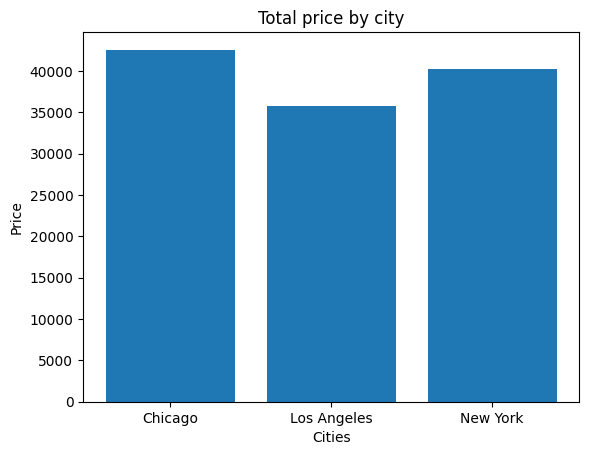

In [ ]:
plt.bar(city_sales.index, city_sales.values)
plt.xlabel('Cities')
plt.ylabel('Price')
plt.title('Total price by city')

<ipython-input-11-d085419c0d5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales_price_df, x='city', y='total_price', palette='viridis')


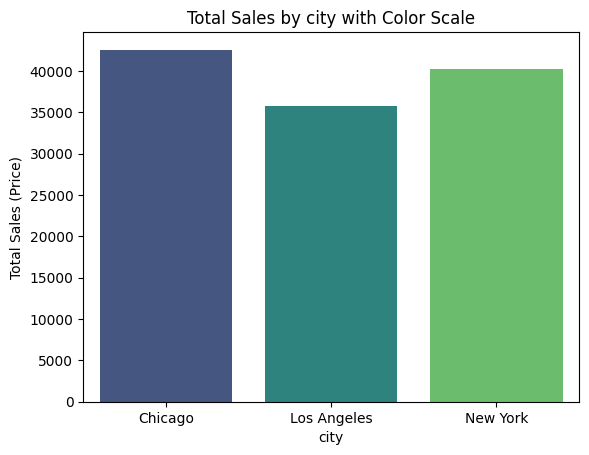

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

city_sales_price_df = city_sales.reset_index()

sns.barplot(data=city_sales_price_df, x='city', y='total_price', palette='viridis')

plt.title('Total Sales by city with Color Scale')
plt.xlabel('city')
plt.ylabel('Total Sales (Price)')
plt.show()


In [ ]:
gender_spending = sales.groupby('gender')['total_price'].mean()
gender_spending


,total_price
gender,
Female,114.969174
Male,121.815246


<ipython-input-13-04bb52b02aec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city_sales, )


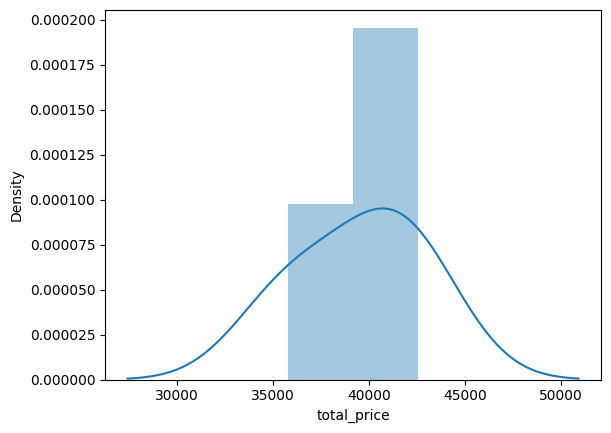

In [ ]:
sns.distplot(city_sales, )
plt.show()

In [ ]:
customer_types = sales.groupby('customer_type')['total_price'].mean()
customer_types

,total_price
customer_type,
Member,122.507035
Normal,114.401384


In [ ]:
top_products = sales.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
top_products

,quantity
product_name,
Shampoo,2238
Orange Juice,2183
Notebook,2165
Detergent,2010
Apple,1741


Text(0.5, 1.0, 'Price')

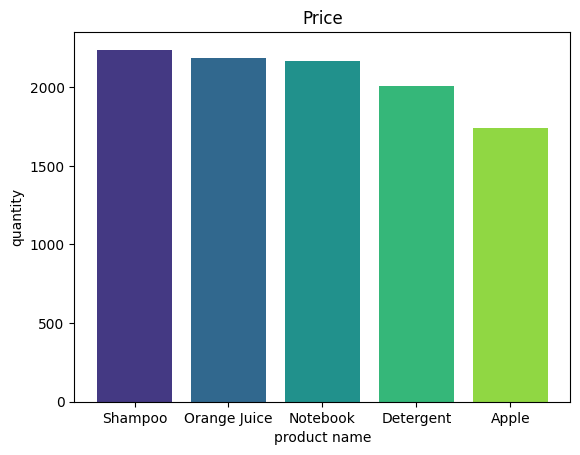

In [ ]:
import seaborn as sns
colors = sns.color_palette('viridis',len(top_products))
plt.bar(top_products.index,top_products.values, color=colors)
plt.xlabel('product name')
plt.ylabel('quantity')
plt.title('Price')

In [ ]:
top_products

,quantity
product_name,
Shampoo,2238
Orange Juice,2183
Notebook,2165
Detergent,2010
Apple,1741


In [ ]:
product_revenue = sales.groupby('product_name')['total_price'].sum().sort_values(ascending=False)
product_revenue


,total_price
product_name,
Shampoo,27041.36
Notebook,24792.98
Orange Juice,24686.46
Detergent,22449.07
Apple,19614.03


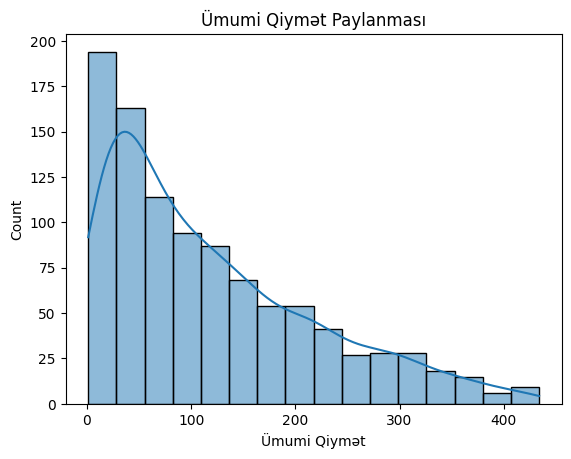

In [ ]:
sns.histplot(sales['total_price'], kde=True)
plt.title("Ümumi Qiymət Paylanması")
plt.xlabel("Ümumi Qiymət")
plt.show()


In [ ]:
tax_by_category = sales.groupby('product_category')['tax'].mean()
tax_by_category


,tax
product_category,
Beverages,8.040909
Fruits,8.200287
Household,7.142071
Personal Care,8.507981
Stationery,6.852071


In [ ]:
products = sales.groupby('product_category')['total_price'].mean()
products

,total_price
product_category,
Beverages,122.905455
Fruits,125.346651
Household,109.170909
Personal Care,130.048942
Stationery,104.732879


<BarContainer object of 5 artists>

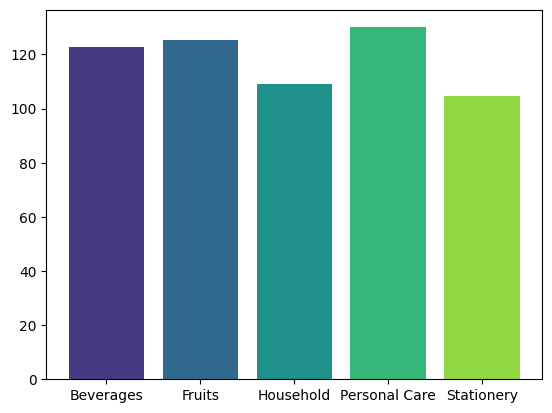

In [ ]:
colors=sns.color_palette('viridis',len(products))
plt.bar(products.index,products.values,color=colors)

In [ ]:
category = sales.groupby('product_name')['product_category']


In [ ]:
category_dict = category.apply(list).to_dict()
category_dict

{'Apple': ['Fruits',
  'Fruits',
  'Fruits',
  'Beverages',
  'Personal Care',
  'Beverages',
  'Fruits',
  'Personal Care',
  'Fruits',
  'Household',
  'Stationery',
  'Personal Care',
  'Fruits',
  'Beverages',
  'Stationery',
  'Beverages',
  'Household',
  'Household',
  'Beverages',
  'Beverages',
  'Personal Care',
  'Stationery',
  'Beverages',
  'Fruits',
  'Beverages',
  'Beverages',
  'Household',
  'Stationery',
  'Stationery',
  'Stationery',
  'Fruits',
  'Household',
  'Fruits',
  'Fruits',
  'Stationery',
  'Personal Care',
  'Household',
  'Household',
  'Personal Care',
  'Fruits',
  'Beverages',
  'Household',
  'Beverages',
  'Beverages',
  'Household',
  'Fruits',
  'Household',
  'Fruits',
  'Household',
  'Stationery',
  'Fruits',
  'Personal Care',
  'Fruits',
  'Stationery',
  'Household',
  'Personal Care',
  'Beverages',
  'Stationery',
  'Personal Care',
  'Personal Care',
  'Beverages',
  'Household',
  'Stationery',
  'Fruits',
  'Personal Care',
  'Bevera

In [ ]:
category_df = sales.groupby('product_name')['product_category'].apply(list).reset_index()

category_df.columns = ['Product Name', 'Product Categories']

print(category_df)


   Product Name                                 Product Categories
0         Apple  [Fruits, Fruits, Fruits, Beverages, Personal C...
1     Detergent  [Household, Beverages, Personal Care, Beverage...
2      Notebook  [Stationery, Stationery, Fruits, Fruits, Stati...
3  Orange Juice  [Beverages, Household, Household, Beverages, P...
4       Shampoo  [Personal Care, Stationery, Personal Care, Hou...


In [ ]:
for product_name, categories in category_dict.items():
    print(f"Product Name: {product_name}")
    print(f"Categories: {categories}")
    print("-" * 30)

Product Name: Apple
Categories: ['Fruits', 'Fruits', 'Fruits', 'Beverages', 'Personal Care', 'Beverages', 'Fruits', 'Personal Care', 'Fruits', 'Household', 'Stationery', 'Personal Care', 'Fruits', 'Beverages', 'Stationery', 'Beverages', 'Household', 'Household', 'Beverages', 'Beverages', 'Personal Care', 'Stationery', 'Beverages', 'Fruits', 'Beverages', 'Beverages', 'Household', 'Stationery', 'Stationery', 'Stationery', 'Fruits', 'Household', 'Fruits', 'Fruits', 'Stationery', 'Personal Care', 'Household', 'Household', 'Personal Care', 'Fruits', 'Beverages', 'Household', 'Beverages', 'Beverages', 'Household', 'Fruits', 'Household', 'Fruits', 'Household', 'Stationery', 'Fruits', 'Personal Care', 'Fruits', 'Stationery', 'Household', 'Personal Care', 'Beverages', 'Stationery', 'Personal Care', 'Personal Care', 'Beverages', 'Household', 'Stationery', 'Fruits', 'Personal Care', 'Beverages', 'Fruits', 'Stationery', 'Fruits', 'Household', 'Personal Care', 'Personal Care', 'Beverages', 'Station